Solution of 2D Truss Problems
=============================
<img src="2D_Truss.png" style="float:right;width:4.5in;">This notebook solves for the axial forces in a 2D Truss.  Specifically, it determines the axial forces in the truss shown to the right.  In this notebook, we use a [pandas data frame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) to store the joint locations.  This allows us to easily reference the joint locations with single letter joint label.  The axial forces are calculated using the process of method of joints.  This is automated by the function [SolveJoint](#Code-for-Solving-Equilibrium-Equations) which forms and solves the equilibrium equations for a joint.  SolveJoint does this by forming and solving a matrix equation which represents the equilibrium conditions.

## Initialization and Code

In [1]:
from matplotlib import pyplot
import matplotlib
from matplotlib import markers
import numpy as np
import pandas as pd
np.set_printoptions(precision = 1)
%precision 1

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

'%.1f'

## Code for Plotting Joints / Members
The code below uses matplotlib to plot the truss.  These function enable us to visually check the definition of

-  `LabeledPoints` plots the points passed through a pandas data frame on a matplotlib axes object.  'LabeledPoints' uses the [scatter](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter) method of the [axes class](http://matplotlib.org/api/axes_api.html).  The proper order of plotting (lines behind points behind text) is set by the zorder parameter as described in this [example](http://matplotlib.org/examples/pylab_examples/zorder_demo.html).
- `PlaceLabel` adds [text](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text) to the point.
- `MakeLines` adds the members (or elements) to the figure.  The list llist passes the points to connect as a list of strings.  For instance llist=['AB','AF','CD'] makes connecting lines between points A and B, A and F, as well as C and D.  An individual row from the passed data frame is returned by [.loc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) which is also [described in the introduction pages](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#indexing-selection).

In [2]:
TextKwargs={'ha':'center','va':'center'}
ms = markers.MarkerStyle(marker='o',fillstyle='full')
def PlaceLabel(t,axes):
    axes.text(t[1],t[2],s=t[0],**TextKwargs)

def LabeledPoints(df,axes):
    c='w'#[0]*df.shape[0]
    axes.scatter(df.values[:,0],df.values[:,1],s= 200,marker=ms,c=c,
                 alpha=1,edgecolors='k',zorder=3)
    for r in df.itertuples():
        PlaceLabel(r,axes)
        
def MakeLines(df,llist,axes):
    for l in llist:
        x=(df.loc[l[0]].values[0],df.loc[l[1]].values[0])
        y=(df.loc[l[0]].values[1],df.loc[l[1]].values[1])
        axes.add_line(matplotlib.lines.Line2D(x,y))

## Code for Solving Equilibrium Equations
`SolveJoint` solves joint equilibrium equations.  The parameter `mlist` passes it a list of the members which connect to the joint.  It determines the unit vectors in each member's direction and [stacks](https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html#numpy.stack) these unit vectors to form a matrix.  The axial force is returned by [inverting](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html) that matrix and [multiplying](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot) by the external force applied to the joint.  This external force is passed as a numpy array trough Fapp.

In [3]:
from numpy.linalg import inv
from numpy.linalg import norm
#def λ(v):
#    return v/norm(v)
def λ(m,points):
    l=(Points.loc[m[1]].values-Points.loc[m[0]].values)
    return l/norm(l)

def SolveJoint(mlist,points,Fapp):
    M=1
    for m in mlist:
        l=λ(m,points)
        if not isinstance(M,np.ndarray):
            M=l
        else:
            M=np.stack((M,l),axis=-1)
    return inv(M).dot(-Fapp)

## Problem Statement
### Joint Locations
The points in alphabetical order are below.  These are used to create a [pandas data frame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).  The main reason for using the data frame is that individual points may be referenced using their label.  These labels are the [index](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#indexing-selection) of the data frame.

In [4]:
#Create an alphabetical list of point locations in (x,y) format.
pl=[(0,0),(2.5,1.5),(5,3),(7.5,1.5),(10,0),(2.5,0),(5,0),(7.5,0)]
#Create list for point labels.
i=[]
for c in 'ABCDEFGH':
    i.append(c)
print('The joint locations are:')
Points=pd.DataFrame(pl,columns=['X','Y'],index=i ); Points

The joint locations are:


,X,Y
A,0.0,0.0
B,2.5,1.5
C,5.0,3.0
D,7.5,1.5
E,10.0,0.0
F,2.5,0.0
G,5.0,0.0
H,7.5,0.0


### Connecting Members

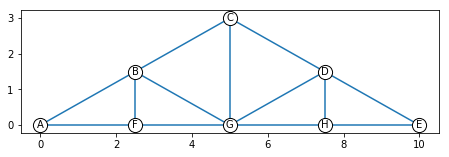

In [5]:
lines=('AB','AF','BF','FG','BG','BC','CG','CD','DG','DH','DE','HE','HG')
ar=10/3;fsx=7.5;fsy=fsx/ar
MyFigure, MyAxes = pyplot.subplots(1,1,figsize=(fsx,fsy));
LabeledPoints(Points,MyAxes)
MakeLines(Points,lines,MyAxes)
MyFigure

### External Forces
The applied and reaction forces are:

In [6]:
Fapp=pd.DataFrame(
    [(0,4),(0,4),(0,-4),(0,-4),(0,0),(0,0),(0,0),(0,0)],columns=['Fx','Fy'],
    index=['A','E','F','H','B','C','D','G']); Fapp

,Fx,Fy
A,0,4
E,0,4
F,0,-4
H,0,-4
B,0,0
C,0,0
D,0,0
G,0,0


## Solve System
### Joint A

In [7]:
mlist=['AB','AF']
T_AB,T_AF = SolveJoint(mlist,Points,Fapp.loc['A'].values)
(T_AB,T_AF)

(-7.8, 6.7)

### Joint F

In [8]:
mlist=['FB','FG']
T_FB,T_FG = SolveJoint(mlist,Points,Fapp.loc['F'].values+T_AF*λ('FA',Points))
(T_FB,T_FG)

(4.0, 6.7)

### Joint B

In [9]:
mlist=['BG','BC']
T_BG,T_BC = SolveJoint(mlist,Points,Fapp.loc['B'].values+
                       T_AB*λ('BA',Points)+T_FB*λ('BF',Points))
(T_BG,T_BC)

(-3.9, -3.9)

### Joint C

In [10]:
mlist=['CD','CG']
T_CD,T_CG = SolveJoint(mlist,Points,Fapp.loc['C'].values+
                       T_BC*λ('CB',Points))
(T_CD,T_CG)

(-3.9, 4.0)

### Joint G

In [11]:
mlist=['GD','GH']
T_DG,T_GH = SolveJoint(mlist,Points,Fapp.loc['G'].values+
                       T_FG*λ('GF',Points)+T_BG*λ('GB',Points)+T_CG*λ('GC',Points))
print('T_GH = {:.1f} and T_DG = {:.1f}.  By symmetry these are the same as T_FG and T_BG'.format(T_GH,T_DG))
print('T_FG = {:.1f} and T_BG = {:.1f}.'.format(T_FG,T_BG))

T_GH = 6.7 and T_DG = -3.9.  By symmetry these are the same as T_FG and T_BG
T_FG = 6.7 and T_BG = -3.9.


### Joint D

In [12]:
mlist=['DH','DE']
T_DH,T_DE = SolveJoint(mlist,Points,Fapp.loc['D'].values+
                       T_DG*λ('DG',Points)+T_CD*λ('DC',Points))
(T_DH,T_DE)

(4.0, -7.8)

### Joint H

In [13]:
mlist=['HE']
T_HE = T_GH - Fapp.loc['H'].values[0];
T_HE

6.7

### Check at joint E

In [14]:
T_DE*λ('ED',Points)+T_HE*λ('EH',Points)+Fapp.loc['E'].values

array([ 0.,  0.])